In [55]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
os.listdir('.')
# os.chdir("drive/My Drive/Colab_Test/Dataset/Regression")

['housing.csv', 'auto.csv', 'winequality-white.csv']

In [57]:
dataset = pd.read_csv('winequality-white.csv')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [58]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [59]:
dataset.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [60]:
dataset.corr()['quality'][:-1]

fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
Name: quality, dtype: float64

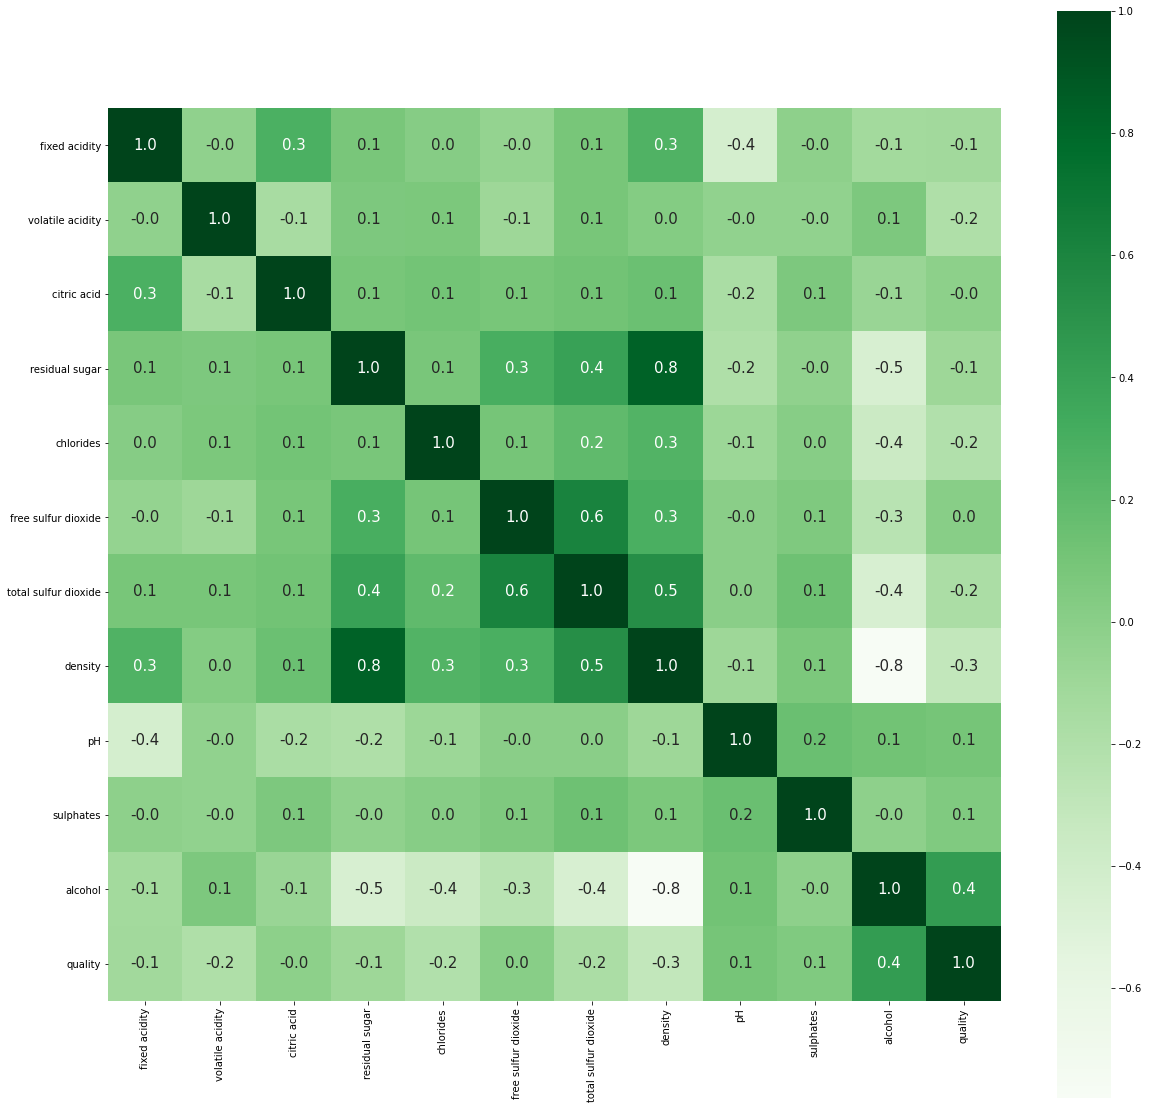

In [61]:
corr = dataset.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size' : 15}, cmap = 'Greens')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c555c6c50>,
      dtype=object)

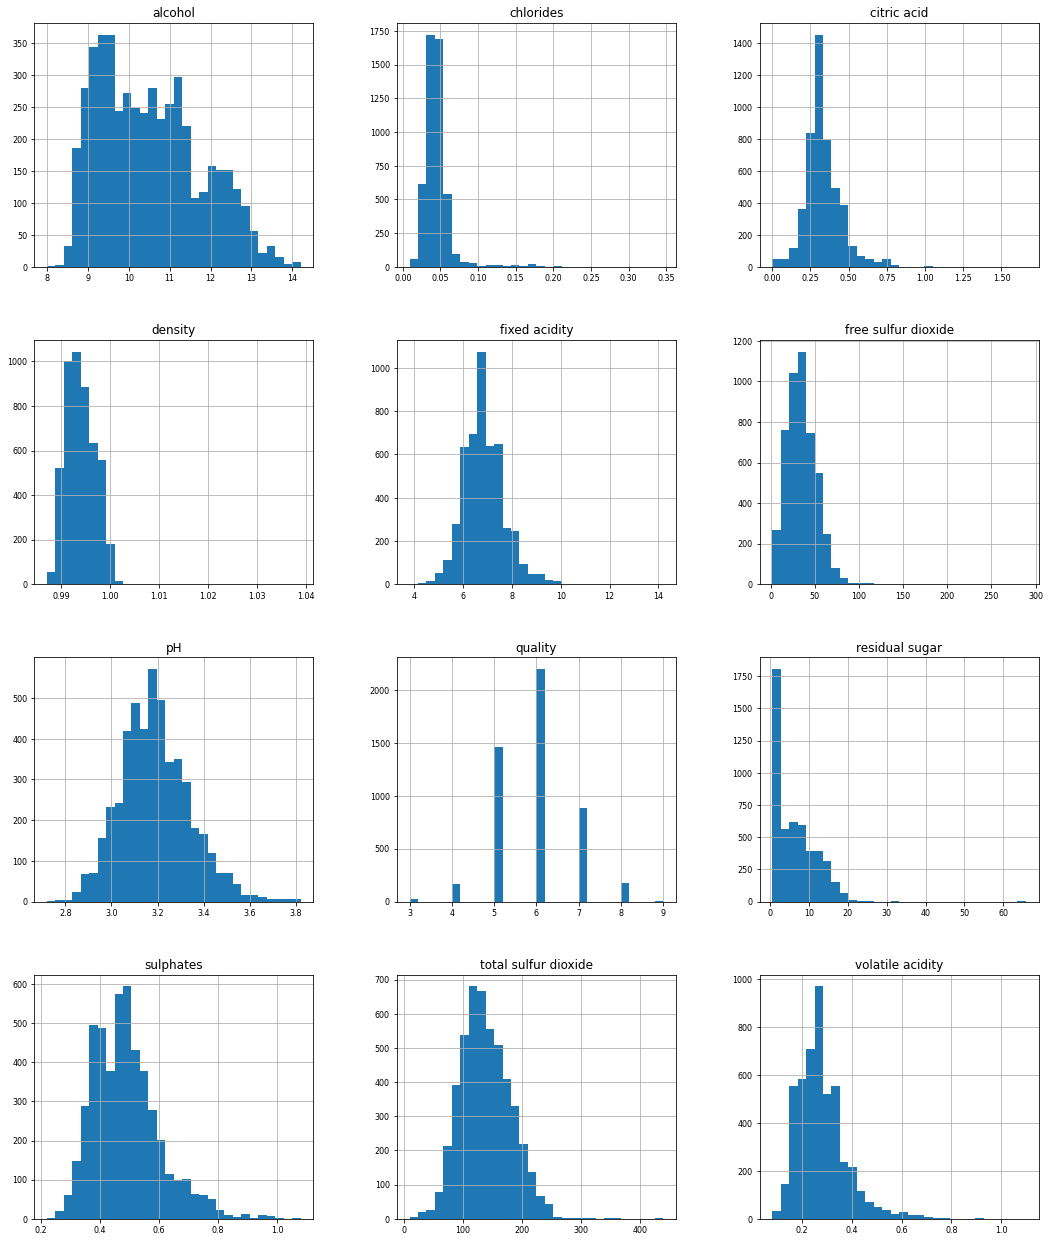

In [62]:
dataset.hist(figsize=(18, 22), bins = 30, xlabelsize= 8, ylabelsize=8)

In [63]:
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [64]:
label = dataset['quality']
features = dataset.drop(['quality'], axis = 1)

**1. Transform Preprocessing**

In [65]:
from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer, MinMaxScaler, RobustScaler, MaxAbsScaler
pre_proc = [StandardScaler(), PowerTransformer(method='yeo-johnson', standardize = True), QuantileTransformer(), MinMaxScaler(), MaxAbsScaler(), RobustScaler()]

for proc in pre_proc : 
  scaler = proc
  features_scaled = scaler.fit_transform(features.values)
  label_scaled = scaler.fit_transform(label.values.reshape(-1,1)).flatten()

  from sklearn.model_selection import train_test_split
  feature_train, feature_test, label_train, label_test = train_test_split(features_scaled, label_scaled, test_size=0.25, random_state=10)

  linear_reg = LinearRegression()

  linear_reg.fit(feature_train, label_train)
  predictions = linear_reg.predict(feature_test)
  
  mse = round(mean_squared_error(label_test, predictions),10)
  mae = round(mean_absolute_error(label_test, predictions),10)
  r2 = round(r2_score(label_test, predictions),10)
  rmse = round(np.sqrt(mean_squared_error(label_test, predictions)),10)

  text = str(proc)
  text1 = text.split('(')[0]


  print(f"Preprocessing dengan model      -> {text1}")
  print(f"MSE (Mean Squared Error)        : {mse}")
  print(f"MAE (Mean Absolute Error)       : {mae}")
  print(f"r^2 score                       : {r2}")
  print(f'RMSE (Root Mean Squared Error)  : {rmse}\n')

Preprocessing dengan model      -> StandardScaler
MSE (Mean Squared Error)        : 0.7075828232
MAE (Mean Absolute Error)       : 0.6554434751
r^2 score                       : 0.2894540453
RMSE (Root Mean Squared Error)  : 0.8411794239

Preprocessing dengan model      -> PowerTransformer
MSE (Mean Squared Error)        : 0.6976934821
MAE (Mean Absolute Error)       : 0.6528074661
r^2 score                       : 0.2929730426
RMSE (Root Mean Squared Error)  : 0.8352804811

Preprocessing dengan model      -> QuantileTransformer
MSE (Mean Squared Error)        : 0.0504976409
MAE (Mean Absolute Error)       : 0.1871006234
r^2 score                       : 0.3153358837
RMSE (Root Mean Squared Error)  : 0.2247168015

Preprocessing dengan model      -> MinMaxScaler
MSE (Mean Squared Error)        : 0.015413425
MAE (Mean Absolute Error)       : 0.0967377941
r^2 score                       : 0.2894540453
RMSE (Root Mean Squared Error)  : 0.1241508155

Preprocessing dengan model      -> MaxAb

**Untuk Metode Box-Cox, tidak digunakan karena Box-Cox hanya akan menjalankan apabila dataset tidak ada angka 0. Jadi apabila di jalankan pada case ini, Box-Cox akan error**

**Pada case ini, QuantileTransformer merupakan scaler yang terbaik dengan r2 0.3153358837**

**2. Masukan Kedalam Algoritma**

In [66]:
from sklearn import preprocessing
# scaler = preprocessing.PowerTransformer(method='yeo-johnson')
scaler = preprocessing.QuantileTransformer(n_quantiles=1000)

features_scaled = scaler.fit_transform(features.values)
label_scaled = scaler.fit_transform(label.values.reshape(-1,1)).flatten()

from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(features_scaled, label_scaled, test_size=0.25, random_state=10)

In [72]:
for i in range(10, 501, 20) :
  print("Random Forest Regressor, dengan n_estimators = ",i)
  forest_reg = RandomForestRegressor(n_estimators=i, random_state=10, max_features='sqrt')
  forest_reg.fit(feature_train, label_train)
  predictions = forest_reg.predict(feature_test)
  print(f"r^2 score Random Forest Regressor                       : {r2_score(label_test, predictions)}")
  print(f'RMSE (Root Mean Squared Error) Random Forest Regressor  : {np.sqrt(mean_squared_error(label_test, predictions))}\n')

Random Forest Regressor, dengan n_estimators =  10
r^2 score Random Forest Regressor                       : 0.5132160198082097
RMSE (Root Mean Squared Error) Random Forest Regressor  : 0.18948066488774

Random Forest Regressor, dengan n_estimators =  30
r^2 score Random Forest Regressor                       : 0.5503902921057927
RMSE (Root Mean Squared Error) Random Forest Regressor  : 0.18210195204244928

Random Forest Regressor, dengan n_estimators =  50
r^2 score Random Forest Regressor                       : 0.5611346718258478
RMSE (Root Mean Squared Error) Random Forest Regressor  : 0.17991293855972587

Random Forest Regressor, dengan n_estimators =  70
r^2 score Random Forest Regressor                       : 0.5661811245530858
RMSE (Root Mean Squared Error) Random Forest Regressor  : 0.1788755505341146

Random Forest Regressor, dengan n_estimators =  90
r^2 score Random Forest Regressor                       : 0.5648624104427297
RMSE (Root Mean Squared Error) Random Forest Reg

In [68]:
for i in range(1, 501, 5) :
  print("XGBRegressor, dengan n_estimators = ",i)
  xg_reg = xgb.XGBRegressor(objective='reg:linear', n_estimators=i)
  xg_reg.fit(feature_train, label_train)
  predictions = xg_reg.predict(feature_test)
  print(f"r^2 score XGBRegressor                       : {r2_score(label_test, predictions)}")
  print(f'RMSE (Root Mean Squared Error) XGBRegressor  : {np.sqrt(mean_squared_error(label_test, predictions))}\n')

XGBRegressor, dengan n_estimators =  1
[15:28:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r^2 score XGBRegressor                       : 0.05467965883982595
RMSE (Root Mean Squared Error) XGBRegressor  : 0.26405005532515724

XGBRegressor, dengan n_estimators =  6
[15:28:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r^2 score XGBRegressor                       : 0.22007638199030155
RMSE (Root Mean Squared Error) XGBRegressor  : 0.2398406526657311

XGBRegressor, dengan n_estimators =  11
[15:28:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r^2 score XGBRegressor                       : 0.292062634139056
RMSE (Root Mean Squared Error) XGBRegressor  : 0.22850419584284506

XGBRegressor, dengan n_estimators =  16
[15:28:17] WARNING: /workspace/src/objective/regression_obj

In [69]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

for i in kernel :
  print("SVR, dengan n_estimators = ",i)
  svr_reg = SVR(kernel = i,C=1.0, epsilon=0.2)
  svr_reg.fit(feature_train, label_train)
  predictions = svr_reg.predict(feature_test)
  print(f"r^2 score SVR                      : {r2_score(label_test, predictions)}")
  print(f'RMSE (Root Mean Squared Error) SVR : {np.sqrt(mean_squared_error(label_test, predictions))}\n')


SVR, dengan n_estimators =  linear
r^2 score SVR                      : 0.3084447017419445
RMSE (Root Mean Squared Error) SVR : 0.22584486357615377

SVR, dengan n_estimators =  poly
r^2 score SVR                      : 0.35800029585541815
RMSE (Root Mean Squared Error) SVR : 0.21760264764701273

SVR, dengan n_estimators =  rbf
r^2 score SVR                      : 0.41413953871896725
RMSE (Root Mean Squared Error) SVR : 0.2078709763548714

SVR, dengan n_estimators =  sigmoid
r^2 score SVR                      : -10118.12183527558
RMSE (Root Mean Squared Error) SVR : 27.31921234118317



In [70]:
for i in range(1, 301, 5) :
  print("KNN Regressor, dengan n_neighbors = ",i)
  knn_reg = KNeighborsRegressor(n_neighbors=1)
  knn_reg.fit(feature_train, label_train)
  predictions = knn_reg.predict(feature_test)
  print(f"r^2 score KNN Regressor                       : {r2_score(label_test, predictions)}")
  print(f'RMSE (Root Mean Squared Error) KNN Regressor  : {np.sqrt(mean_squared_error(label_test, predictions))}\n')



KNN Regressor, dengan n_neighbors =  1
r^2 score KNN Regressor                       : 0.25713550443771516
RMSE (Root Mean Squared Error) KNN Regressor  : 0.23407312993995172

KNN Regressor, dengan n_neighbors =  6
r^2 score KNN Regressor                       : 0.25713550443771516
RMSE (Root Mean Squared Error) KNN Regressor  : 0.23407312993995172

KNN Regressor, dengan n_neighbors =  11
r^2 score KNN Regressor                       : 0.25713550443771516
RMSE (Root Mean Squared Error) KNN Regressor  : 0.23407312993995172

KNN Regressor, dengan n_neighbors =  16
r^2 score KNN Regressor                       : 0.25713550443771516
RMSE (Root Mean Squared Error) KNN Regressor  : 0.23407312993995172

KNN Regressor, dengan n_neighbors =  21
r^2 score KNN Regressor                       : 0.25713550443771516
RMSE (Root Mean Squared Error) KNN Regressor  : 0.23407312993995172

KNN Regressor, dengan n_neighbors =  26
r^2 score KNN Regressor                       : 0.25713550443771516
RMSE (Roo

**Dari pengujian diatas didapatkan r2 terbesar adalah 0.572 dan rmse terbesar adalah 0.177.
Angka diatas didapatkan dari Random Forest Regressor dengan n_estimators 470.**